In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Усложняем датасет: больше признаков, больше информативных признаков, больше шума, нелинейные зависимости
np.random.seed(42)
n_samples = 500
n_features = 10

# Генерируем линейную часть
X, y = make_regression(
    n_samples=n_samples, 
    n_features=n_features, 
    n_informative=5, 
    noise=20, 
    shuffle=True, 
    random_state=42
)

# Добавим нелинейные признаки
X_nl1 = (X[:, 0] ** 2).reshape(-1, 1)
X_nl2 = (np.sin(X[:, 1])).reshape(-1, 1)
X_nl3 = (X[:, 2] * X[:, 3]).reshape(-1, 1)
X_nl4 = (np.exp(0.01 * X[:, 4])).reshape(-1, 1)

# Объединяем все признаки
X = np.hstack([X, X_nl1, X_nl2, X_nl3, X_nl4, np.ones((X.shape[0], 1))])

# Добавим дополнительный шум к целевой переменной
y = y + 10 * np.sin(X[:, 0]) + 5 * np.log(np.abs(X[:, 1]) + 1) + np.random.normal(0, 10, size=y.shape)

# Формируем DataFrame
feature_names = [f'Feature_{i+1}' for i in range(n_features)] + ['NL_sq1', 'NL_sin2', 'NL_mul3_4', 'NL_exp5', 'Bias']
df = pd.DataFrame(X, columns=feature_names)
df['Target'] = y

print(df.head())

   Feature_1  Feature_2  Feature_3  ...   NL_exp5  Bias     Target
0  -1.222895  -0.918127   1.331339  ...  0.996046   1.0  66.601067
1  -1.106526  -0.024125   1.126565  ...  0.998557   1.0  61.978343
2   0.184551   1.208366   2.558199  ...  1.005943   1.0  88.826277
3   0.558140  -1.151014   0.463289  ...  0.997957   1.0   9.065206
4  -0.147603  -0.532701  -1.768439  ...  0.971686   1.0 -68.860922

[5 rows x 16 columns]


Text(0.5, 1.02, 'Парные графики: все признаки vs Target')

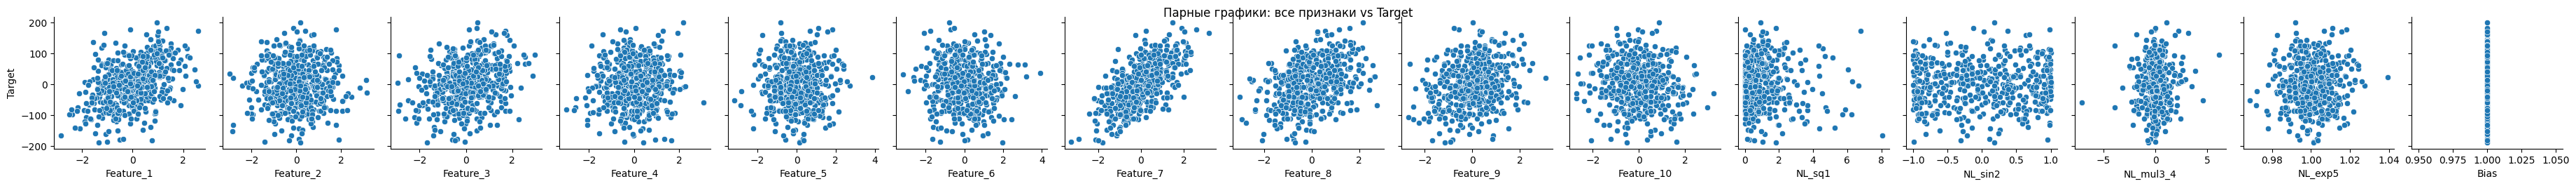

In [9]:
sns.pairplot(df, x_vars=df.columns.drop('Target'), y_vars='Target', height=2.5)
plt.suptitle('Парные графики: все признаки vs Target', y=1.02)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Размеры обучающей и тестовой выборок:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}", '\n')
print('Среднее значение y_test:', np.mean(y_test))

Размеры обучающей и тестовой выборок:
X_train: (400, 15), y_train: (400,)
X_test: (100, 15), y_test: (100,) 

Среднее значение y_test: -6.977476790559015


In [11]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_sklearn = model.predict(X_test)
print('R2 (sklearn):', r2_score(y_test, y_pred_sklearn)) 
print('MSE (sklearn):', np.sqrt(mean_squared_error(y_test, y_pred_sklearn)))

R2 (sklearn): 0.8835578559636559
MSE (sklearn): 24.47234194315898


In [6]:
w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
print("Найденные веса:", w, '\n')
y_pred = X_test @ w

print('R2:', r2_score(y_test, y_pred))
print('MSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

Найденные веса: [ 3.57429470e+01  7.18975797e-01  2.03889051e+01  7.65697136e-01
  5.66552195e+01 -5.27178421e-01  4.53289278e+01  2.48155310e+01
  1.53526578e+01 -1.64719550e+00  1.15774838e-01 -1.64908706e+00
 -2.84652953e-02 -5.67342707e+03  5.67540702e+03] 

R2: 0.8835578558969122
MSE: 24.47234195017266


In [12]:
model_sgd = SGDRegressor()
model_sgd.fit(X_train, y_train)
y_pred_sklearn = model_sgd.predict(X_test)
print('R2 (sklearn):', r2_score(y_test, y_pred_sklearn)) 
print('MSE (sklearn):', np.sqrt(mean_squared_error(y_test, y_pred_sklearn)))

R2 (sklearn): 0.8837946113386758
MSE (sklearn): 24.44745015387544


In [7]:
# --- Градиентный спуск ---
def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m, n = X.shape
    w = np.zeros(n)  # Инициализируем веса
    for i in range(n_iterations):
        y_pred = X @ w
        error = y_pred - y
        gradient = (2 / m) * X.T @ error
        w -= learning_rate * gradient
        if i % 100 == 0:
            loss = mean_squared_error(y, X @ w)
            print(f"Итерация {i}: Loss = {loss:.6f}")
    return w

# Обучение
w = gradient_descent(X_train, y_train, learning_rate=0.01, n_iterations=1200)

# Предсказание
y_pred = X_test @ w

# Оценка
print("\nНайденные веса:", w)
print('R2:', r2_score(y_test, y_pred))
print('MSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

Итерация 0: Loss = 4874.943641
Итерация 100: Loss = 578.646016
Итерация 200: Loss = 496.059505
Итерация 300: Loss = 494.009618
Итерация 400: Loss = 493.935645
Итерация 500: Loss = 493.925390
Итерация 600: Loss = 493.918603
Итерация 700: Loss = 493.912821
Итерация 800: Loss = 493.907819
Итерация 900: Loss = 493.903490
Итерация 1000: Loss = 493.899741
Итерация 1100: Loss = 493.896495

Найденные веса: [ 3.57460360e+01  3.64307656e-01  2.03893309e+01  7.95777949e-01
 -1.61803432e-01 -5.19553857e-01  4.52746944e+01  2.48604241e+01
  1.53708425e+01 -1.63162047e+00  9.64229742e-02 -1.13064754e+00
 -4.46274327e-02  8.70807345e-01  8.72987206e-01]
R2: 0.8827044138830051
MSE: 24.56186106291634
